<a href="https://colab.research.google.com/github/arcrowell/Decision-Optimization-Simulation/blob/main/Problem_Set_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import norm

#Problem Set 1

##1

In [ ]:
#Problem 1 from DOS Problem Set 1
# Goal: 20,000 followers in 15 weeks.
# Context: 1.5k new followers each week that have never followed
# 8% that do follow will stop following after a week.
# 15% of those that left the page in the past will join again each week.
# Start fresh with 0 followers.

# Initialize arrays (length 16, all zeros)
Ft = np.zeros(16) #Followers
Ut = np.zeros(16) #Total Unfollowers
Lt = np.zeros(16) #Weekly Unfollowers
Rt = np.zeros(16) #Weekly Returners

# Loop
for i in range(15):
    Lt[i+1] = 0.08 * Ft[i]
    Rt[i+1] = 0.15 * Ut[i]
    Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
    Ft[i+1] = Ft[i] + 1500 - Lt[i+1] + Rt[i+1]

# Create DataFrame
result = pd.DataFrame({
    "Followers": Ft.round(),
    "Total Unfollowers": Ut.round(),
    "Weekly Unfollowers": Lt.round(),
    "Weekly Returns": Rt.round()
})

result

# No, she will not reach her target in 15 weeks if she starts fresh with 0 followers.

,Followers,Total Unfollowers,Weekly Unfollowers,Weekly Returns
0,0.000000,0.000000,0.000000,0.000000
1,1500.000000,0.000000,0.000000,0.000000
2,2880.000000,120.000000,120.000000,0.000000
3,4168.000000,332.000000,230.000000,18.000000
4,5384.000000,616.000000,333.000000,50.000000
5,6546.000000,954.000000,431.000000,92.000000
6,7665.000000,1335.000000,524.000000,143.000000
7,8752.000000,1748.000000,613.000000,200.000000
8,9814.000000,2186.000000,700.000000,262.000000
9,10857.000000,2643.000000,785.000000,328.000000


##2

In [ ]:
#Problem 2 from DOS Problem Set 1

def social_media_sim(followers, weeks, new, per_unfollow, per_refollows):

  # Initialize arrays (length weeks+1, all zeros)
  Ft = np.zeros(56) #Total Followers
  Ut = np.zeros(56) #Total Unfollowers
  Lt = np.zeros(56) #Weekly Unfollowers
  Rt = np.zeros(56) #Weekly Refollowers

  # Loop
  for i in range(55):
      Lt[i+1] = per_unfollow * Ft[i]
      Rt[i+1] = per_refollows * Ut[i]
      Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
      Ft[i+1] = Ft[i] + new - Lt[i+1] + Rt[i+1]

      if Ft[i] >= followers and i <= weeks:
        result = print("Goal met in", i, "weeks. Goal met by", (Ft[i]-followers).round(),".")
        break

      elif Ft[i] >= followers and i <= 52:
        result = print("Goal not met. The number of followers are", Ft[weeks].round(),". Additional weeks necessary",i-weeks,".")
        break

      elif (Ft[i] == 0 and i > 0) or (Ft[i] < followers and i >= 52):
        result = print("Goal will not be met.")
        break

  return result

social_media_sim(15000, 15, 1500, 0.08, 0.15)

Goal met in 14 weeks. Goal met by 906.0 .


##3

Goal not met. The number of followers are 16897.0 . Additional weeks necessary 4 .


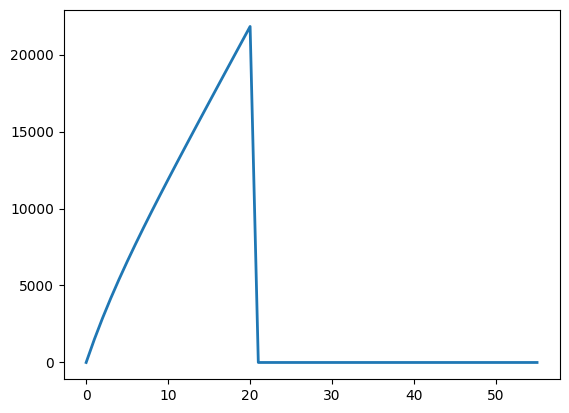

In [ ]:
#Problem 3 from DOS Problem Set 1

def social_media_sim(followers, weeks, new, per_unfollow, per_refollows):

  # Initialize arrays (length weeks+1, all zeros)
  Ft = np.zeros(56) #Total Followers
  Ut = np.zeros(56) #Total Unfollowers
  Lt = np.zeros(56) #Weekly Unfollowers
  Rt = np.zeros(56) #Weekly Refollowers

  # Loop
  for i in range(55):
      Lt[i+1] = per_unfollow * Ft[i]
      Rt[i+1] = per_refollows * Ut[i]
      Ut[i+1] = Ut[i] + Lt[i+1] - Rt[i+1]
      Ft[i+1] = Ft[i] + new - Lt[i+1] + Rt[i+1]

      if Ft[i] >= followers and i <= weeks:
        result = print("Goal met in", i, "weeks. Goal met by", (Ft[i]-followers).round(),".")
        break

      elif Ft[i] >= followers and i <= 52:
        result = print("Goal not met. The number of followers are", Ft[weeks].round(),". Additional weeks necessary",i-weeks,".")
        break

      elif (Ft[i] == 0 and i > 0) or (Ft[i] < followers and i >= 52):
        result = print("Goal will not be met.")
        break

  plt.plot(Ft, linewidth=2)
  plt.title = "Followers per Week to Target"
  plt.show()
  return result

social_media_sim(20000, 15, 1500, 0.08, 0.15)

## 4

In [ ]:
#Problem 4 from DOS Problem Set 1
#Do not have it working properly, change line 8 for trial and error.
#Trial and error found 4715, nearest multiple of 500 would be 5000 starting users.
def find_init_users(per_new, churn, per_reactivate, act_cap, target_num, weeks):

# Initialize arrays (length weeks+1, all zeros)
  Au = np.zeros(weeks+1) #Active Users
  Au[0] = 5000
  Nu = np.zeros(weeks+1) #New Users
  Wrt = np.zeros(weeks+1) #Weekly Returners
  Iu = np.zeros(weeks+1) #Inactive Users

# Loop
  for i in range(weeks):
    Nu[i+1] = per_new * Au[i]
    Wrt[i+1] = min(per_reactivate * Iu[i], act_cap)
    Iu[i+1] = Iu[i] + churn - Wrt[i]
    Au[i+1] = Au[i] + Nu[i] + Wrt[i] - churn

    if Au[i] >= target_num:
      starting_users = print("Minimum number of starting users is", Au[0])
      break

    elif Au[i] < target_num and i+1 == weeks:
      starting_users = print("Not possible under given assumptions")
      break

  return starting_users

find_init_users(0.15, 750, 0.25, 500, 20000, 20)

Minimum number of starting users is 5000.0


## 5

In [ ]:
#Problem 5 from DOS Problem Set 1

# Discrete values and probabilities
x = np.array([3, 5, 6, 9, 11, 15])
p = np.array([0.20, 0.10, 0.15, 0.05, 0.30, 0.20])

# CDF = cumulative sum of probabilities
cdf = np.cumsum(p)

# Combine into a table
dist = pd.DataFrame({
    "x": x,
    "PMF": p,
    "CDF": cdf
})

dist

,x,PMF,CDF
0,3,0.200000,0.200000
1,5,0.100000,0.300000
2,6,0.150000,0.450000
3,9,0.050000,0.500000
4,11,0.300000,0.800000
5,15,0.200000,1.000000


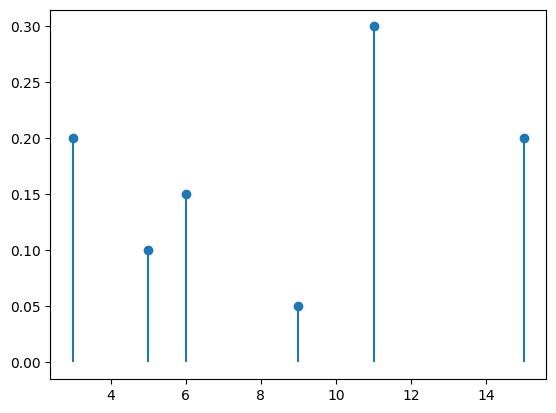

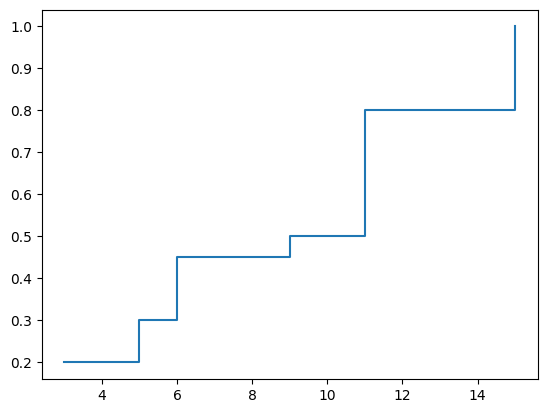

In [ ]:
# PMF
plt.stem(x, p, basefmt=" ")
plt.xlabel = ("x")
plt.ylabel = ("P(X = x)")
plt.title = ("Probability Mass Function")
plt.show()

# CDF
plt.step(x, cdf, where="post")
plt.xlabel = ("x")
plt.ylabel = ("P(X ≤ x)")
plt.title = ("Cumulative Distribution Function")
plt.ylim = (0, 1.05)
plt.show()

In [ ]:
# mean
mean = (dist.x * dist.PMF).sum()
float(mean)

8.75

In [ ]:
# median
median = dist[dist.CDF >= .5]['x'].iloc[0]
median

np.int64(9)

In [ ]:
# mode
mode = dist.loc[dist.PMF.idxmax(),"x"]
mode

np.int64(11)

In [ ]:
variance = ( (dist.x-mean)**2 * (dist.PMF) ).sum()
variance

np.float64(18.487500000000004)

In [ ]:
sd = np.sqrt(variance)
sd

np.float64(4.299709292498739)

## 6

Using excel, see image below.
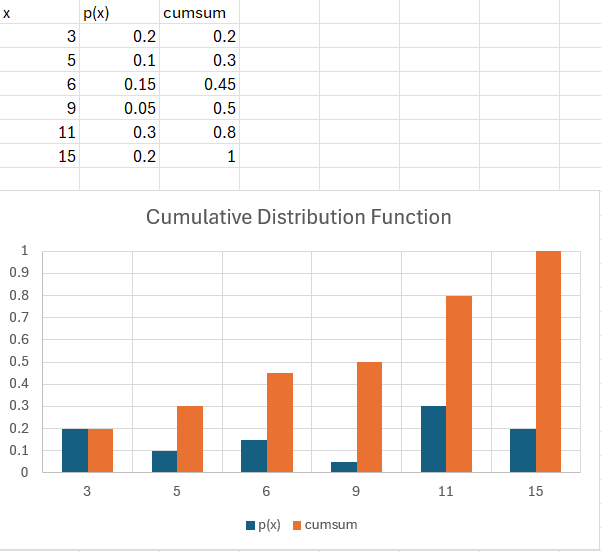

## 7

In [ ]:
#Problem 7 from DOS Problem Set 1

#a: 52 heads and 48 tails
#b: 22.04% propability of getting 6 heads in 10 flips.
n = 10
x = 6
p = .52
print(binom.pmf(x,n,p))

0.22039630340727748


In [ ]:
#c: 0.006%
n = 1000
x = 580
p = .52
print(1-binom.cdf(x,n,p))

6.160718715797486e-05


In [ ]:
#d: 8.68%
n = 100
x = 70
p = .7

binom.pmf(x,n,p)

np.float64(0.0867838647534282)

##8


In [ ]:
#Problem 8 from DOS Problem Set 1
# forward step .41
# backwards step .59
#a: 4.8% probability of walking 7 forward steps
n = 10 #number of steps
x = 7 #number of forward steps
p = .41 #probability of a forward step
binom.pmf(x,n,p)

np.float64(0.04799812561848699)

In [ ]:
#b: 42% probability of walk ending further than 3 steps away from start

n = 10 #number of steps
x = 3 #number of forward steps
p = .41 #probability of a forward step
less = binom.cdf(x,n,p)
print(less)

0.357523753697533


In [ ]:
#b: 42% probability of walk ending further than 3 steps away from start

n = 10 #number of steps
x = 6 #number of forward steps
p = .41 #probability of a forward step
more = 1-binom.cdf(x,n,p)
print(more)

combined = less+more
print("Probability of three steps further from the start", combined)

0.0625718917496696
Probability of three steps further from the start 0.42009564544720257


In [ ]:
#b: Simulation

k = 100
n = 10
p = 0.41

step_decision = np.random.rand(k, n)

steps = np.where(step_decision < p, 1, -1)

end = np.sum(steps, axis=1)

further_than_three = np.sum(end > 3)
prob_ftt = further_than_three / k
print(prob_ftt)

0.05


#Problem Set 2



## 1

In [ ]:
#a: p(x<5) = 71.35%
expon.cdf(5, loc = 0, scale = 4)

np.float64(0.7134952031398099)

In [ ]:
#b: p(x<=5) = 71.35%
expon.cdf(5, loc = 0, scale = 4)

np.float64(0.7134952031398099)

In [ ]:
#c: p(x>6) = 22.31%
1-expon.cdf(6, loc = 0, scale = 4)

np.float64(0.2231301601484298)

In [ ]:
#d: x such that p(x) < 3 # not sure on this one
print(expon.cdf(3, loc=0, scale=4))
print(expon.ppf(0.52, loc=0, scale=4))

0.5276334472589853
2.9358767003208017


In [ ]:
#e: x such that p(x) >= 4 #not sure on this one
print(1-expon.cdf(4, loc=0, scale=4))
print(expon.ppf(0.37, loc=0, scale=4))

0.36787944117144233
1.8481418383862347


##2

In [ ]:
#a: p(x>3) = 14.29%
1 - poisson.cdf(3,2)

np.float64(0.14287653950145296)

In [ ]:
#b: p(x<1) = 40.6%
poisson.pmf(0,2)

np.float64(0.1353352832366127)

In [ ]:
#c: p(x=0) = 13.53%
poisson.pmf(0,2)

np.float64(0.1353352832366127)

In [ ]:
#d: p(x>=4) = 14.29%
1-poisson.cdf(3,2)

np.float64(0.14287653950145296)

In [ ]:
#e: p(x>4) = 5.27%
1 - poisson.cdf(4,2)

np.float64(0.052653017343711084)

In [ ]:
#f: p(x<=4) = 94.73%
poisson.cdf(4,2)

np.float64(0.9473469826562889)

## 3

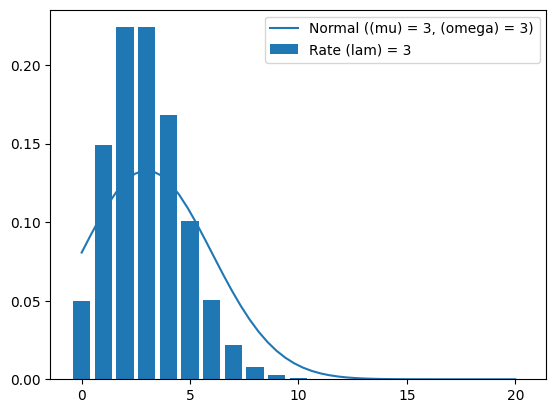

In [ ]:
#x-values for Poisson
pk = np.arange(21)
lam = 3
pmf_values = poisson.pmf(pk, lam)

#x-values for Normal Distribution
nk = np.linspace(0,20)
mu = 3
omega = 3
npdf_values = norm.pdf(nk, mu, omega)

#Plotting Poisson
plt.bar(pk, pmf_values, label=f'Rate (lam) = {lam}')

#Plotting Normal
plt.plot(nk, npdf_values, label=f'Normal ((mu) = {mu}, (omega) = {omega})')

plt.title = ('Comparing Poisson vs Normal Distribution')
plt.xlabel = (f'Number of Events (pk)')
plt.ylabel = ('Probability')
plt.xticks = (pk)
plt.legend();
plt.show()

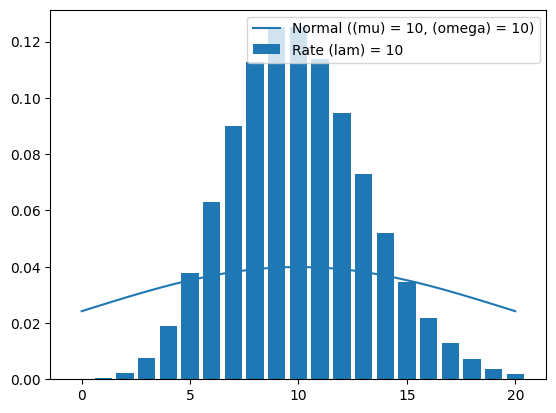

In [ ]:
pk = np.arange(21)
lam = 10
pmf_values = poisson.pmf(pk, lam)

#x-values for Normal Distribution
nk = np.linspace(0,20)
mu = 10
omega = 10
npdf_values = norm.pdf(nk, mu, omega)

#Plotting Poisson
plt.bar(pk, pmf_values, label=f'Rate (lam) = {lam}')

#Plotting Normal
plt.plot(nk, npdf_values, label=f'Normal ((mu) = {mu}, (omega) = {omega})')

plt.title = ('Comparing Poisson vs Normal Distribution')
plt.xlabel = (f'Number of Events (pk)')
plt.ylabel = ('Probability')
plt.xticks = (pk)
plt.legend();
plt.show()

### 3 Commentary

When lambda = 3, the Poisson distribution is significantly skewed right compared to the Poisson distribution showing a normal bell curve in the middle when lambda = 10.

When using the normal, the better approximation is when lambda is 10, because of the more symmetrical looking Poisson distribution.

## 4

In [ ]:
def binest(lam, x):

  exact_prob = poisson.pmf(x,lam)

  approx_prob = poisson.cdf(x,lam)

  pct_err = (abs(approx_prob - exact_prob) / exact_prob) * 100

  return {
    "Exact Probability": exact_prob,
    "Approximate Probability": approx_prob,
    "Percent Error": pct_err
    }

binest(4, 6)

{'Exact Probability': np.float64(0.10419563456702102),
 'Approximate Probability': np.float64(0.8893260215974264),
 'Percent Error': np.float64(753.5156250000009)}

## 5

In [ ]:
#a: 18.4%
poisson.pmf(2,1)

np.float64(0.18393972058572114)

In [ ]:
#b: 73.58%
poisson.cdf(1,1)

np.float64(0.7357588823428847)

In [ ]:
#c: 0.06%
1 - poisson.cdf(5,1)

np.float64(0.0005941848175816666)

## 6

In [ ]:
#a: 13.53%
1 - expon.cdf(20, loc = 0, scale = 10)

np.float64(0.1353352832366127)

In [ ]:
#b: 63.21%
expon.cdf(10, loc = 0, scale = 10)

np.float64(0.6321205588285577)

In [ ]:
#c: A little over 35 minutes.
expon.ppf(0.97, loc = 0, scale = 10)

np.float64(35.065578973199806)

In [ ]:
#d: Neil's Bank
print(expon.cdf(8, loc = 0, scale = 8))

#d: Sydney's Bank
print(expon.cdf(10, loc = 0, scale = 10))

# Neil's Bank is equally likely as Sydney's Bank

0.6321205588285577
0.6321205588285577
